<a href="https://colab.research.google.com/github/YehorSavchenko/AnalitykaDanychUJ/blob/master/Cwiczenia2/Assignment_2_soltion_YehorSavchenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

house_df = pd.read_csv('kc_house_data.csv')
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

a) 

In [113]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]




model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 
#Your code:
model.fit(X,y)
#Hint: .fit()

LinearRegression(n_jobs=1)

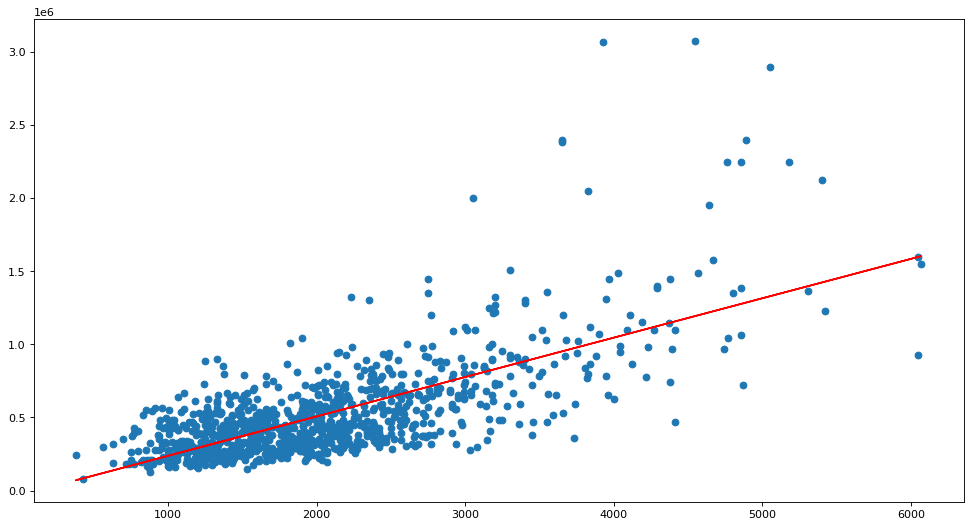

-32304.654721028113
[269.46205468]
0.49670880166311393


In [114]:
#b)

#Your code:
pr = model.predict(X)

plt.figure(figsize=(15,8),dpi=80)
plt.scatter(X,y)
plt.plot(X,pr, color = 'r')
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.score(X,y))
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

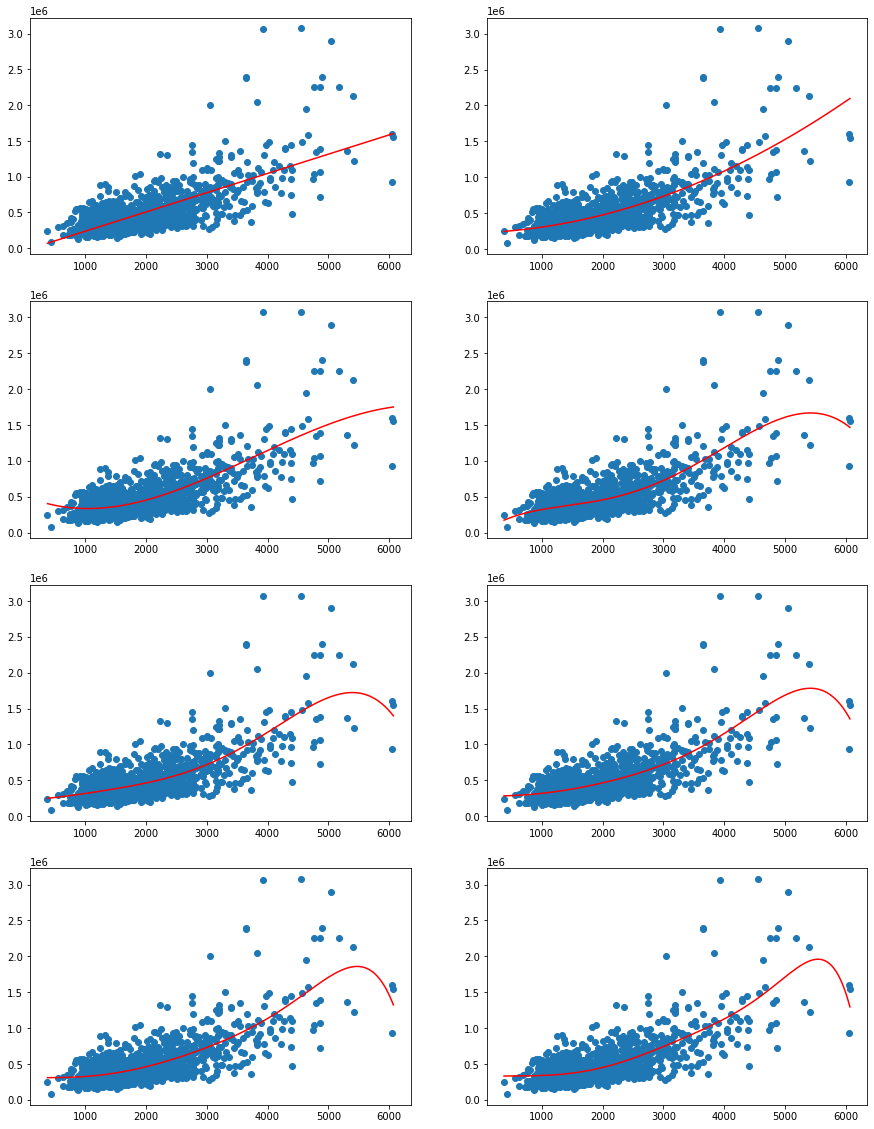

In [137]:
#c)
plt.figure(figsize=(15,20))
error, degree = [], []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    #Your code:
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)
    
    #errors
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    error.append(mean_squared_error(y, y_pr))
    degree.append(order)

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
  

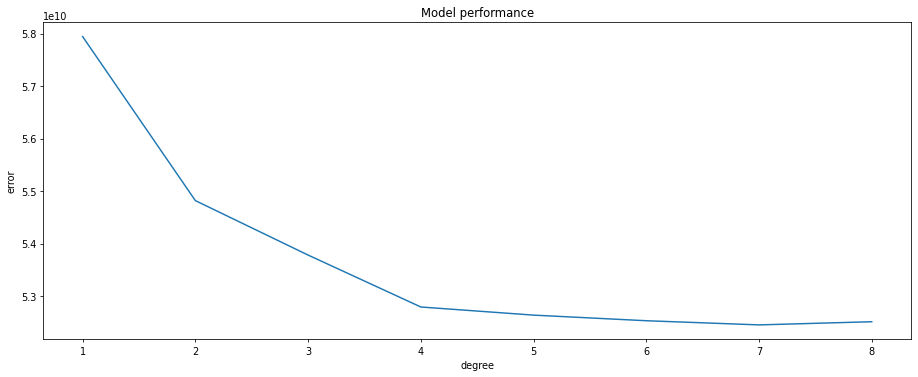

In [116]:
#Your code:
plt.figure(figsize=(16, 6), dpi=70)
plt.plot(degree, error)
plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.show()


## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

In [132]:
#a)
error_train, error_test, degree = [], [], []
model_linear = LinearRegression()
for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    
    poly = PolynomialFeatures(order, include_bias = False)
    x_train_poly = poly.fit_transform(X_train)
    x_test_poly = poly.fit_transform(X_test)
    #errors
    model_linear.fit(x_train_poly, y_train)
    y_train_pr = model_linear.predict(x_train_poly)
    y_test_pr = model_linear.predict(x_test_poly)

    error_train.append(mean_squared_error(y_train, y_train_pr))
    error_test.append(mean_squared_error(y_test, y_test_pr))
    degree.append(order)


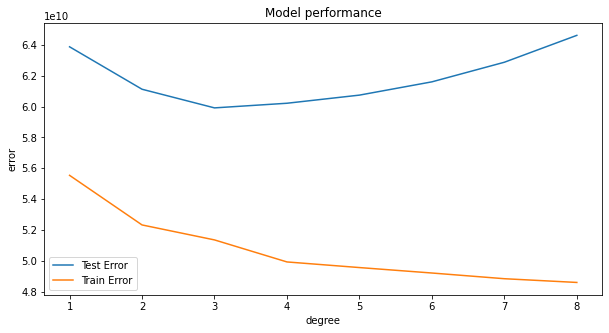

In [133]:
plt.figure(figsize=(10,5))
plt.plot(degree, error_test, label="Test Error")
plt.plot(degree, error_train, label="Train Error")

plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.legend()
plt.show()

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

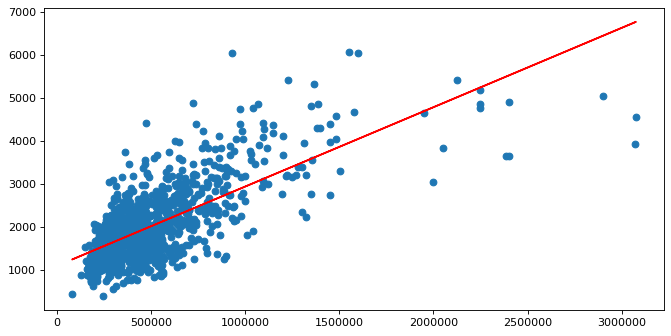

In [143]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model_linear = LinearRegression()
model_linear.fit(X,y)
y_pr = model_linear.predict(X)

plt.figure(figsize=(10,5),dpi=80)
plt.scatter(X,y)
plt.plot(X,y_pr, color = 'r')
plt.ticklabel_format(style = 'plain')
plt.show()

In [150]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
X = house_df[['sqft_living', 'grade', 'view', 'bedrooms', 'bathrooms', 'waterfront', 'floors', 'condition']].values.reshape(-1,8)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48749267368.97092
Mean squared error equals: 50322314972.11236
